<a href="https://colab.research.google.com/github/polo-music/mice-classification/blob/main/mice_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mice-classification/Data_Cortex_Nuclear.csv')

# Changing the display of Pandas
pd.set_option('display.max_rows', df.shape[0])
pd.set_option('display.max_columns', df.shape[1])

In [5]:
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

In [7]:
def null_values(dataframe, threshold = 1, color = 'blue'):
  plt.figure(figsize = (15, 3))
  null_percentage = dataframe.isnull().mean() * 100
  null_percentage.sort_values(ascending = False)[:10].plot.bar(color = color)

  plt.axhline(y = threshold, color = 'r', linestyle = '-')
  plt.title('% of Null values per column with threshold', fontsize = 20, weight = 'bold')
  plt.text(10, threshold + 8, f'Columns with more than {threshold}% of missing values', fontsize = 12, color = 'black', ha = 'left', va = 'top')
  plt.text(10, threshold - 4, f'Columns with less than {threshold}% of missing values', fontsize = 12, color = 'green', ha = 'left', va = 'top')

  plt.xlabel('Columns', fontsize = 12)
  plt.ylabel('Percentage of missing values', fontsize = 12)

  return plt.show()

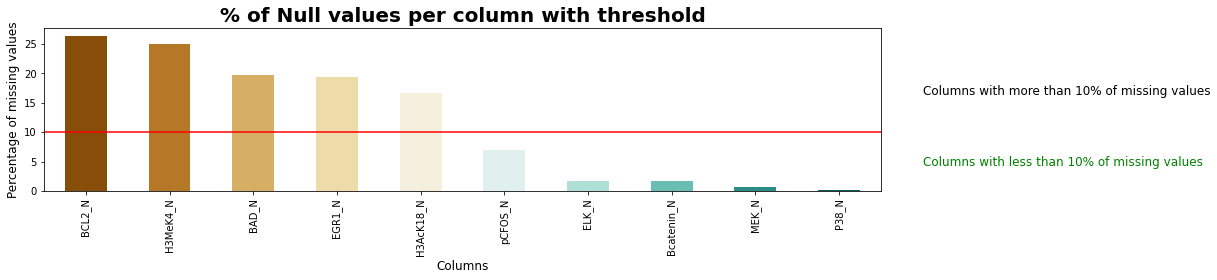

In [8]:
null_values(df, 10, color = sns.color_palette('BrBG', 10))

In [9]:
# Drop all the columns above the threshold of 10%
df1 = df.dropna(how = 'any', axis = 1, thresh = df.shape[0] * 0.9)

In [10]:
df1.shape
df1.isnull().sum().sort_values(ascending = False)

pCFOS_N            75
ELK_N              18
Bcatenin_N         18
MEK_N               7
MTOR_N              3
ERK_N               3
GSK3B_N             3
JNK_N               3
RSK_N               3
APP_N               3
SOD1_N              3
AMPKA_N             3
CREB_N              3
pMTOR_N             3
DSCR1_N             3
DYRK1A_N            3
NR2B_N              3
pNUMB_N             3
RAPTOR_N            3
TIAM1_N             3
pP70S6_N            3
P38_N               3
TRKA_N              3
CAMKII_N            3
pERK_N              3
ITSN1_N             3
BDNF_N              3
NR1_N               3
BRAF_N              3
pAKT_N              3
pBRAF_N             3
pCAMKII_N           3
pCREB_N             3
pELK_N              3
NR2A_N              3
pJNK_N              3
pMEK_N              3
pNR1_N              3
pNR2A_N             3
pNR2B_N             3
pPKCAB_N            3
pRSK_N              3
PKCA_N              3
AKT_N               3
SHH_N               0
P3525_N   

In [11]:
# Analyse the columns with more missing values
df1['pCFOS_N'].describe()
df1['ELK_N'].describe()
df1['Bcatenin_N'].describe()

count    1062.000000
mean        2.146550
std         0.435742
min         1.134886
25%         1.826707
50%         2.114769
75%         2.423875
max         3.680552
Name: Bcatenin_N, dtype: float64

In [12]:
# Create a new dataframe with the means of all the columns that have missing values
df2 = df1.fillna(df1.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [13]:
# Check for duplicates, skiping this part
# Info of the final dataframe, including objects (discrete values)
df2.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,pCFOS_N,SYP_N,CaNA_N
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,0.545904,0.313505,0.317939,0.275033,0.825813,0.726933,1.561965,1.525338,0.442848,0.682236,0.378519,0.363357,0.180492,1.173400,2.474492,1.172603,0.241644,0.272789,0.693180,0.168417,0.404808,2.146550,0.542635,0.452459,0.415311,0.759047,0.585186,0.368370,0.565317,0.357095,0.315813,0.418605,0.394475,0.181080,0.943116,0.161211,1.706599,0.292434,0.429226,1.197420,0.216482,0.166631,0.179307,0.121521,0.156478,0.181300,0.210489,0.120889,0.221851,0.126560,0.527349,0.291276,1.548348,2.235236,0.159821,1.239270,0.848767,0.226676,0.121521,0.131053,0.446073,1.337784
std,0.249015,0.251290,0.049314,0.346810,0.931802,0.041577,0.027004,1.293368,0.032542,0.466254,0.344829,0.051906,0.052164,0.046099,0.117805,0.187752,0.270361,0.481110,0.066579,0.127257,0.216087,0.052279,0.026334,0.332973,0.652488,0.244411,0.033854,0.040942,0.120657,0.028099,0.061088,0.432092,0.280178,0.065397,0.089166,0.122276,0.100461,0.062496,0.088079,0.062938,0.054087,0.067194,0.155953,0.029296,0.172838,0.019308,0.578442,0.037380,0.137440,0.361743,0.185309,0.031896,0.018826,0.014276,0.015071,0.024919,0.069010,0.013233,0.034886,0.026885,0.082057,0.030015,0.248132,0.254395,0.024150,0.173580,0.094311,0.028989,0.014276,0.023018,0.066432,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,0.149155,0.052110,0.191431,0.056818,0.500160,0.281285,0.301609,0.567840,0.095942,0.064421,0.143894,0.212960,0.113636,0.497695,1.131796,0.151124,0.046298,0.147201,0.198743,0.107394,0.235595,1.134886,0.217120,0.201143,0.227880,0.166579,0.155321,0.226409,0.184785,0.185598,0.194824,0.237777,0.131120,0.117999,0.344120,0.099976,0.598767,0.181157,0.130206,0.529108,0.052528,-0.062008,0.072326,0.067254,0.100217,0.099734,0.096233,0.086114,0.111382,0.072580,0.284001,0.207438,0.853176,1.206098,0.101233,0.750664,0.577397,0.155869,0.067254,0.085419,0.258626,0.586479
25%,0.288163,0.473669,0.287650,2.059152,3.160287,0.205821,0.164619,2.479861,0.190828,1.206389,0.337486,0.281530,0.281850,0.244294,0.743594,0.591311,1.381308,1.168648,0.404152,0.597317,0.264356,0.330887,0.161867,0.947889,1.993693,1.023321,0.220425,0.247322,0.617329,0.149639,0.366469,1.830090,0.319712,0.410961,0.352023,0.683557,0.531223,0.326750,0.515099,0.312771,0.276193,0.372059,0.282131,0.159334,0.826742,0.149253,1.296830,0.272594,0.316684,0.930548,0.103571,0.149025,0.168172,0.110839,0.146969,0.166451,0.167991,0.112765,0.195665,0.108895,0.475634,0.270059,1.375598,2.079338,0.142838,1.116262,0.793739,0.206395,0.1108

In [14]:
df.describe(include = 'object')

,MouseID,Genotype,Treatment,Behavior,class
count,1080,1080,1080,1080,1080
unique,1080,2,2,2,8
top,309_1,Control,Memantine,S/C,c-CS-m
freq,1,570,570,555,150


In [15]:
def plot_figure(column_name, dataframe, palette = 'BrBG'):
  plt.figure(figsize = (8,4))
  ax = sns.countplot(x = column_name, data = dataframe, palette = palette)
  ax.set_title(f'Distribution of {column_name}', fontsize = 20, pad = 20)
  ax.set_xlabel(f'{column_name}', fontsize = 12)
  ax.set_ylabel(f'Count of {column_name}', fontsize = 12)

  print(dataframe[column_name].value_counts())

Control    570
Ts65Dn     510
Name: Genotype, dtype: int64


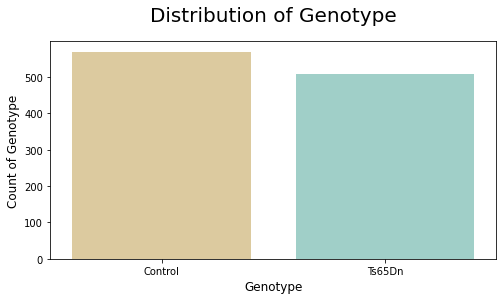

In [17]:
plot_figure('Genotype', df2)

S/C    555
C/S    525
Name: Behavior, dtype: int64


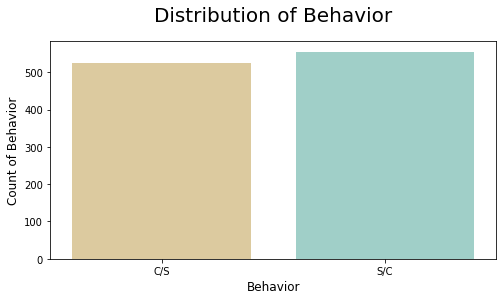

In [18]:
plot_figure('Behavior', df2)

Memantine    570
Saline       510
Name: Treatment, dtype: int64


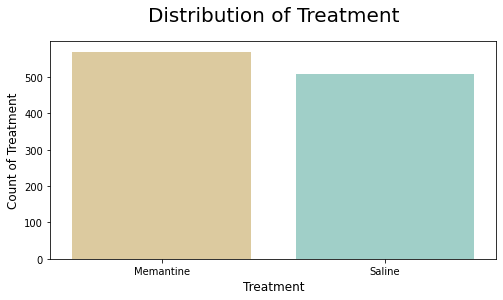

In [19]:
plot_figure('Treatment', df2)

c-CS-m    150
c-SC-m    150
c-CS-s    135
c-SC-s    135
t-CS-m    135
t-SC-m    135
t-SC-s    135
t-CS-s    105
Name: class, dtype: int64


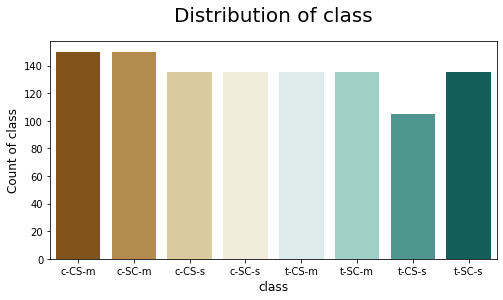

In [16]:
plot_figure('class', df2)

We're interested in categorize (or classify) our data in the 'class' variable. First we have to encode the categorical variables into numerical variables in order to use them in our clustering algorithm.

In [25]:
# We create a dictionary to create a new dataset
classes = {
    0: 'c-CS-m',
    1: 'c-SC-m',
    2: 'c-CS-s',
    3: 'c-SC-s',
    4: 't-CS-m',
    5: 't-SC-m',
    6: 't-CS-s',
    7: 't-SC-s'
}

y = df2['class'].replace(classes)
y = pd.DataFrame(y)

y.reset_index()
y['class'].value_counts()

c-CS-m    150
c-SC-m    150
c-CS-s    135
c-SC-s    135
t-CS-m    135
t-SC-m    135
t-SC-s    135
t-CS-s    105
Name: class, dtype: int64